In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Rikos ja rangaistus,1983
1,The Day of the Broken,2014
2,Bug Off!,2001
3,Hell's Highroad,1925
4,Like Night and Day,1998


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
Maya                    11
Othello                 11
The Outsider            11
The Three Musketeers    11
Paradise                10
Temptation              10
Kismet                  10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [8]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1187
1936    1130
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

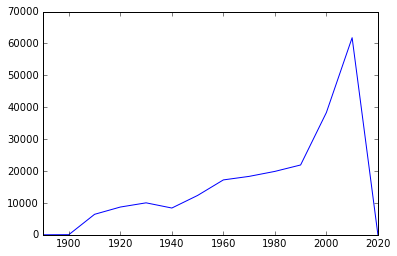

In [30]:
(titles.year // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

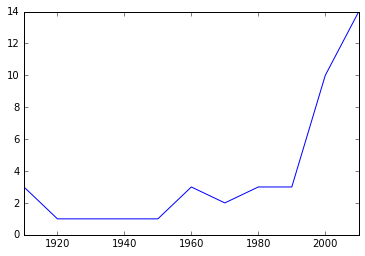

In [29]:
(titles.loc[titles.title.str.startswith("Hamlet")].year // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

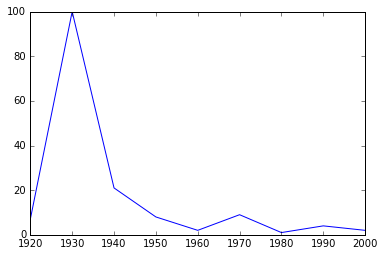

In [36]:
(cast.loc[cast.character.str.startswith("Rustler")].year // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

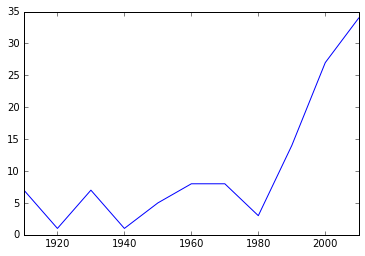

In [37]:
(cast.loc[cast.character.str.startswith("Hamlet")].year // 10 * 10).value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [40]:
cast.character.value_counts().head(11)

Himself        18981
Dancer         11578
Extra           9941
Reporter        7877
Doctor          7185
Student         6719
Policeman       6687
Party Guest     6459
Nurse           6394
Bartender       6358
Minor Role      6113
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [45]:
cast.loc[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Hillary Clinton        5
Kareena Kapoor         5
Jane Fonda             5
Bunny Yeager           5
Rekha                  5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [46]:
cast.loc[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Franklin D. Roosevelt    20
Benito Mussolini         20
Bill Clinton             20
Name: name, dtype: int64

In [62]:
# cast.loc[(cast.name == "Adolf Hitler") & (cast.character == "Himself")].sort_values("year")
# huh, didn't know imdb had [--v]... 
# http://www.imdb.com/name/nm0386944/bio

### Which actors or actresses appeared in the most movies in the year 1945?

In [79]:
tmp = cast.loc[cast.year == 1945].name.value_counts();
print(tmp[tmp >= tmp[5-1]])
del tmp

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
Name: name, dtype: int64


### Which actors or actresses appeared in the most movies in the year 1985?

In [80]:
tmp = cast.loc[cast.year == 1985].name.value_counts();
print(tmp[tmp >= tmp[5-1]])
del tmp

Mammootty        21
Shakti Kapoor    19
Sukumari         19
Lou Scheimer     15
Mohanlal         15
Name: name, dtype: int64


### Plot how many roles Mammootty has played in each year of his career.

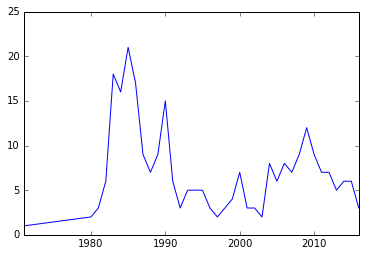

In [85]:
cast.loc[cast.name == "Mammootty"].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [88]:
cast.loc[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in Restaurant             3
Patron in restaurant             3
Patron in cabaret                3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [89]:
cast.loc[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         56
Science Fair Student     9
Science Student          9
Science Club Member      5
Science Reporter         5
Science Fair Judge       5
Science Promo Cadet      5
Science Kid              4
Science Fair Kid         3
Science teacher          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

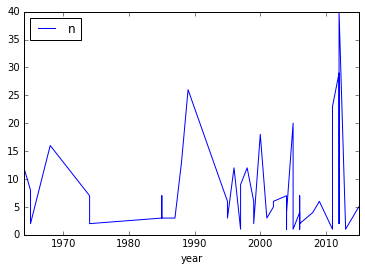

In [108]:
cast.loc[cast.name == "Judi Dench"].dropna(subset=['n']).sort_values('year').plot(x='year', y='n')

### Plot the n-values of Cary Grant's roles through his career.

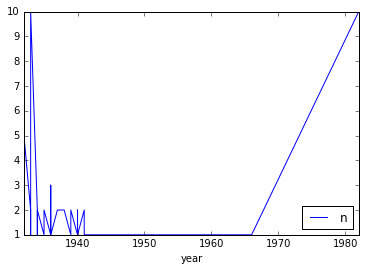

In [110]:
cast.loc[cast.name == "Cary Grant"].dropna(subset = ['n']).sort_values('year').plot(x = 'year', y = 'n')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

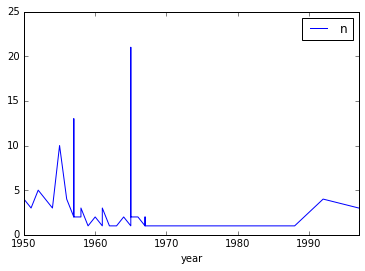

In [111]:
cast.loc[cast.name == "Sidney Poitier"].dropna(subset = ['n']).sort_values('year').plot(x = 'year', y = 'n')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [188]:
tmp1 = cast.loc[(cast.n == 1) & (cast.type == "actor") & (cast.year // 10 * 10 == 1950)].year.value_counts().sort_index();
tmp2 = cast.loc[(cast.n == 1) & (cast.type == "actress") & (cast.year // 10 * 10 == 1950)].year.value_counts().sort_index();
res = pd.concat([tmp1,tmp2],axis=1)
res.reset_index(level=0,inplace=True)
res.columns = ['year', 'actor', 'actress']
print(res)
del tmp1, tmp2, res


   year  actor  actress
0  1950    615      277
1  1951    643      275
2  1952    598      288
3  1953    641      294
4  1954    635      303
5  1955    620      272
6  1956    631      296
7  1957    716      291
8  1958    703      280
9  1959    692      305


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [189]:
tmp1 = cast.loc[(cast.n == 2) & (cast.type == "actor") & (cast.year // 10 * 10 == 1950)].year.value_counts().sort_index();
tmp2 = cast.loc[(cast.n == 2) & (cast.type == "actress") & (cast.year // 10 * 10 == 1950)].year.value_counts().sort_index();
res = pd.concat([tmp1,tmp2],axis=1)
res.reset_index(level=0,inplace=True)
res.columns = ['year', 'actor', 'actress']
print(res)
del tmp1, tmp2, res

   year  actor  actress
0  1950    428      408
1  1951    445      425
2  1952    430      421
3  1953    453      445
4  1954    405      473
5  1955    411      443
6  1956    455      425
7  1957    471      497
8  1958    476      476
9  1959    488      468
